
# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project I will be analysing movie data.This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The data set was original from IMDB. Kaggle removed the original version of this dataset and replaced it with a similar set of films and data fields from The Movie Database (TMDb). 
>
> In particlar I will be interested in rather focusing on which genre are popular from year to year? What properties are associated with movies with high revenue? What properties are associated with highly rated movies? Does a director play a role in making a movie popular? Is there a relationship between the budget of a movie and its revenue? and many more discoveires to explore.


In [11]:
# importing packages I plan to use. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> In this section, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. I have documented my steps carefully and justified my cleaning decisions.

### General Properties

In [15]:
# Loading data and printi out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies (1).csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### Columns to Drop
>We have 21 columns as guided by the above code. Some columns such as "id", 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords', and 'release_date' I will have to drop them because the infomation they contain is not useful in answering my qeustions.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Row with Null values 
>This dataframe has 10866 entries. The following columns have null values (any column not in the list and as nulls is destined to be dropped for the afore mentioned reasons) 'Cast', 'Directors', 'Genres' & 'production_companies'
> We will drop the rows with null when we deem neccessary. We clearly can not fill them with pandas' method because they are strings. 

### Datatypes
>No much to worry on data types based on our columns of interest. We will need to change 'release_year' datatype to 

In [18]:
#checking for duplicated rows
df.duplicated().sum()

1

### Duplicated Rows
>We only have 1 duplicated row. Follow along as we will drop it.

### Data Cleaning 
#### Cleaning Column Labels 
##### 1. Dropping extraneous columns
Droping features that aren't relevant to our questions. I am using pandas' drop function.
Columns to Drop:"id", 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords', and 'release_date' 


In [24]:
# drop columns from dataset
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'release_date'], axis=1, inplace=True)
# confirm changes
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


#### 2. Dropping duplicated rows
>We have only one duplicated row. 

In [28]:
#Print to confirm the duplicated row.
df[df.duplicated() == True]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010,30000000.0,967000.0


In [29]:
#Dropping the duplicated row.
df.drop_duplicates(inplace=True)

In [31]:
#confirming the duplicated row as been dropped.
df.duplicated().sum()

0

#### 3. Drop Rows with Missing Values
>I have a large number (1030) of null values on 'production_companies', 'cast', 'popularity' and 'genres'.
I could not simply use fillna() function but this are not numericals.
>After investigations I have decided to drop all null values. This is because I will use 'Director' to answer some qestions like, is a certain director associated with movie popularity? Including nulls in this case will cloud my analysis.


In [32]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [44]:
#dropping rows with missing values
df.dropna(inplace=True)


In [45]:
#confirm we dropped all null values
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> Now that I've trimmed and cleaned the data, I'm ready to move on to exploration. I will Compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section. 

## Research Question 1 . 
### Are popular movies associated with high revenue? 

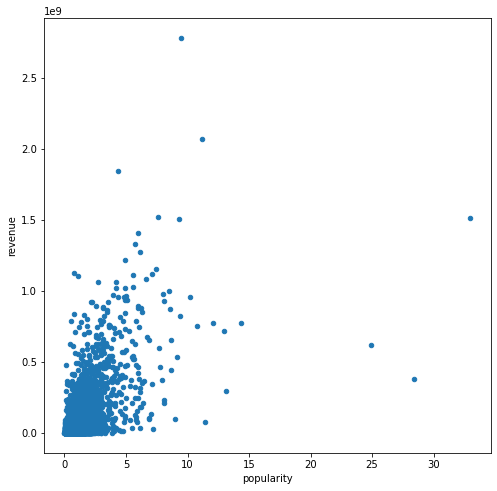

In [49]:
#plotting on scatter plot to check if there is correlation between revenue and popularity.
df.plot(x='popularity', y='revenue', kind='scatter', figsize=(8,8));

### Findings
>There is a positive linear correlation between revenue generated by a certain movie and its poplarity. The relationsip is strong during the initial incremental stages of revenue.
>We have some outliers from both ends. There is a movie with abnormal revenue with popularity which is below its 'standards'.
At the same time we have a movie with so much of popularity but revenue does not match.
>Yes popular movies are associated with high revenue but we cannot conclude that popularity makes a movie generate more revenue. 

 ## Research Question 2. 
 ### Is there a relationship between the budget of a movie and its revenue?

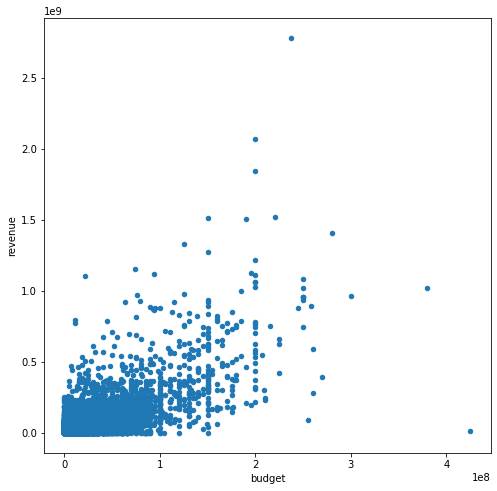

In [66]:
#plotting on scatter plot to check if there is correlation between revenue and popularity.
df.plot(x='budget', y='revenue', kind='scatter', figsize=(8,8));

### Findings
>There is a strong positive linear correlation between revenue generated by a certain movie and its budget. 
>Yes popular movies are associated with high revenue but we cannot conclude that popularity makes a movie generate more revenue. 
>There is a correlation between the two variables. But it doest mean that budget directly affect revenue . This require  further investigation.

 ## Research Question 3. 
 ### Which genre are popular from year to year?

In [64]:
df.release_year.max()-df.release_year.min()

55

In [65]:
#creating a data frame for movies released the last 3 yrs
df_release_3yrs = df.query('release_year >= 2012')
df_release_3yrs

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073,0.003611,348164,0,Bronies: The Extremely Unexpected Adult Fans o...,Tara Strong|John de Lancie|Cathy Weseluck|Pete...,Laurent Malaquais,88,Documentary,Big Focus Television,13,5.8,2013,3.258931e+05,0.000000e+00
6075,0.002719,0,0,Embrace of the Vampire,Sharon Hinnendael|Kaniehtiio Horn|Chelsey Reis...,Carl Bessai,91,Horror,Bloodline Pictures,19,4.9,2013,0.000000e+00,0.000000e+00
6076,0.006115,0,137460,Mistaken for Strangers,Matt Berninger|Tom Berninger|Aaron Dessner|Bry...,Tom Berninger,75,Documentary|Music,Final Frame|C5,14,7.4,2013,0.000000e+00,1.286671e+05
6077,0.002648,0,0,Atlantic Rim,Graham Greene|David Chokachi|Jackie Moore|Nico...,Jared Cohn,85,Action|Science Fiction,The Asylum|Tiki Terrors,21,2.2,2013,0.000000e+00,0.000000e+00


<a id='conclusions'></a>
## Conclusions


>There is a positive linear correlation between revenue generated by a certain movie and its poplarity. The relationsip is strong during the initial incremental stages of revenue.
>We have some outliers from both ends. There is a movie with abnormal revenue with popularity which is below its 'standards'.
At the same time we have a movie with so much of popularity but revenue does not match.
>Yes popular movies are associated with high revenue but we cannot conclude that popularity makes a movie generate more revenue.
>There is a strong positive linear correlation between revenue generated by a certain movie and its budget. 
>Yes popular movies are associated with high revenue but we cannot conclude that popularity makes a movie generate more revenue. 
